<a href="https://colab.research.google.com/github/real-lake050317/codelab_JinhoKim/blob/main/school/ss3_numberRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 김진호 - 숫자 인식 모델
## All codes written by Jinho Kim, 
### All rights reserved.
### May be distributed under BSD clause-2 license

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential  
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout
from keras.utils import np_utils

np.random.seed(777)  # 랜덤 시드

In [ ]:
from keras.datasets import mnist

nb_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


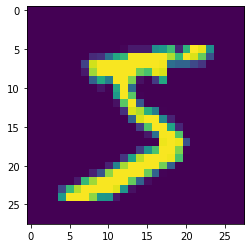

y =  5


In [ ]:
import matplotlib.pyplot as plt

id = 0

plt.imshow(x_train[id])
plt.show()

print('y = ', y_train[id])

In [ ]:
for x in x_train[id]:
  for i in x:
    print('{:3} '.format(i), end='') 
  print()
# http://snowdeer.github.io/machine-learning/2018/01/09/recognize-mnist-data/

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [ ]:
x_train1D = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_train1D = x_train1D.astype('float32') / 255
# one_hot
y_train_one_hot = np_utils.to_categorical(y_train, nb_classes) 

In [ ]:
x_test1D = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_test1D = x_test1D.astype('float32') / 255
# one_hot
y_test_one_hot = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
activation = 'relu' # activation 함수: relu, sigmoid 등

model = Sequential()

model.add(Dense(100, input_dim=784))      # MNIST data image of shape 28 * 28 = 784
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_absolute_error',    # mean square error, mean absolute error 등
              optimizer='adam',   # sgd, adam, RMSprop etc.
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train1D, y_train_one_hot, epochs=30, batch_size=256)
score = model.evaluate(x_test1D, y_test_one_hot)
print('\nAccuracy:', score[1])

Epoch 1/30
235/235 [==============================] - 2s 7ms/step - loss: 7.1840e-04 - accuracy: 0.9984
Epoch 2/30
235/235 [==============================] - 2s 7ms/step - loss: 6.7604e-04 - accuracy: 0.9984
Epoch 3/30
235/235 [==============================] - 2s 6ms/step - loss: 6.4836e-04 - accuracy: 0.9984
Epoch 4/30
235/235 [==============================] - 2s 7ms/step - loss: 6.2037e-04 - accuracy: 0.9984
Epoch 5/30
235/235 [==============================] - 2s 6ms/step - loss: 5.9304e-04 - accuracy: 0.9984
Epoch 6/30
235/235 [==============================] - 2s 7ms/step - loss: 5.7466e-04 - accuracy: 0.9984
Epoch 7/30
235/235 [==============================] - 2s 7ms/step - loss: 5.5218e-04 - accuracy: 0.9985
Epoch 8/30
235/235 [==============================] - 2s 6ms/step - loss: 5.2728e-04 - accuracy: 0.9985
Epoch 9/30
235/235 [==============================] - 2s 6ms/step - loss: 5.0558e-04 - accuracy: 0.9985
Epoch 10/30
235/235 [==============================] - 1s 6ms/st

# **성능평가 결과**


* MSE + sgd : 0.88
* MSE + adam : 0.91
* MAE + sgd : 0.92
* MAE + adam : 0.97
* MAE + RMSprop: 0.978

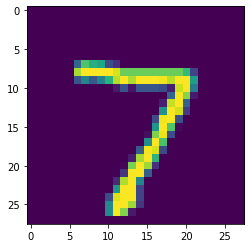

Answer:  7
[[2.2312432e-15 1.0136879e-16 2.9320233e-12 4.3406847e-09 3.1365784e-20
  5.6452989e-12 3.5905634e-22 1.0000000e+00 3.3241925e-12 1.2444069e-10]]
Prediction:  7


In [ ]:
test_id = 0 # id 변경 후 실행
plt.imshow(x_test[test_id])
plt.show()

print('Answer: ', y_test[test_id])

test_img = x_test1D[test_id]
test_img = test_img.reshape(1,28*28)

y_prob = model.predict(test_img, verbose = 0)
print(y_prob)

y_pred = model.predict(test_img, verbose = 0)
print("Prediction: ", np.argmax(y_pred))